In [1]:
import pandas as pd
#pd.__version__

import numpy as np
import glob
import os
import zipfile
import json

import requests
import gzip
!pip install googletrans==3.1.0a0
from googletrans import Translator

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Importing books, fiction/non classification, authors, and book series JSON files**




In [3]:
#goodreads 2.3M metadata information to load

path = ("/content/gdrive/My Drive/goodreads_books.json.gz")
def load_data(file_name, head = 80000):
    count = 0
    data = []
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)  
            count += 1
            data.append(d)
            # break if reaches the 100th line
            if (head is not None) and (count > head):
                break
    return data


In [4]:

books = load_data(os.path.join(path))

In [5]:
books_df = pd.DataFrame(books)
books_df[:10]

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,0312853122,1,[],US,,"[{'count': '3', 'name': 'to-read'}, {'count': ...",,false,4.00,,[],,Paperback,https://www.goodreads.com/book/show/5333265-w-...,"[{'author_id': '604031', 'role': ''}]",St. Martin's Press,256,1,9780312853129,9,,1984,https://www.goodreads.com/book/show/5333265-w-...,https://images.gr-assets.com/books/1310220028m...,5333265,3,5400751,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film
1,0743509986,6,[],US,,"[{'count': '2634', 'name': 'to-read'}, {'count...",,false,3.23,B000FC0PBC,"[8709549, 17074050, 28937, 158816, 228563, 112...","Anita Diamant's international bestseller ""The ...",Audio CD,https://www.goodreads.com/book/show/1333909.Go...,"[{'author_id': '626222', 'role': ''}]",Simon & Schuster Audio,,1,9780743509985,10,Abridged,2001,https://www.goodreads.com/book/show/1333909.Go...,https://s.gr-assets.com/assets/nophoto/book/11...,1333909,10,1323437,Good Harbor,Good Harbor
2,,7,[189911],US,eng,"[{'count': '58', 'name': 'to-read'}, {'count':...",B00071IKUY,false,4.03,,"[19997, 828466, 1569323, 425389, 1176674, 2627...",Omnibus book club edition containing the Ladie...,Hardcover,https://www.goodreads.com/book/show/7327624-th...,"[{'author_id': '10333', 'role': ''}]","Nelson Doubleday, Inc.",600,,,,Book Club Edition,1987,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,7327624,140,8948723,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ..."
3,0743294297,3282,[],US,eng,"[{'count': '7615', 'name': 'to-read'}, {'count...",,false,3.49,B002ENBLOK,"[6604176, 6054190, 2285777, 82641, 7569453, 70...",Addie Downs and Valerie Adler were eight when ...,Hardcover,https://www.goodreads.com/book/show/6066819-be...,"[{'author_id': '9212', 'role': ''}]",Atria Books,368,14,9780743294294,7,,2009,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,6066819,51184,6243154,Best Friends Forever,Best Friends Forever
4,0850308712,5,[],US,,"[{'count': '32', 'name': 'to-read'}, {'count':...",,false,3.40,,[],,,https://www.goodreads.com/book/show/287140.Run...,"[{'author_id': '149918', 'role': ''}]",,,,9780850308716,,,,https://www.goodreads.com/book/show/287140.Run...,https://images.gr-assets.com/books/1413219371m...,287140,15,278577,Runic Astrology: Starcraft and Timekeeping in ...,Runic Astrology: Starcraft and Timekeeping in ...
5,1599150603,7,[],US,,"[{'count': '56', 'name': 'to-read'}, {'count':...",,false,4.13,B00DU10PUG,[],"Relates in vigorous prose the tale of Aeneas, ...",Paperback,https://www.goodreads.com/book/show/287141.The...,"[{'author_id': '3041852', 'role': ''}]",Yesterday's Classics,162,13,9781599150604,9,,2006,https://www.goodreads.com/book/show/287141.The...,https://s.gr-assets.com/assets/nophoto/book/11...,287141,46,278578,The Aeneid for Boys and Girls,The Aeneid for Boys and Girls
6,0425040887,4,[],US,,"[{'count': '14', 'name': 'to-read'}, {'count':...",,false,4.38,,[],,Paperback,https://www.goodreads.com/book/show/378460.The...,"[{'author_id': '215594', 'role': ''}]",Berkley Publishing Group,,1,9780425040881,3,,1979,https://www.goodreads.com/book/show/378460.The...,https://s.gr-assets.com/assets/nophoto/book/11...,378460,12,368291,The Wanting of Levine,The Wanting of Levine
7,1934876569,6,[151854],US,,"[{'count': '515', 'name': 'to-read'}, {'count'...",,false,4.22,,"[948696, 439885, 274955, 12978730, 372986, 216...","To Kara's astonishment, she discovers that a p...",Paperback,https://www.goodreads.com/book/show/6066812-al...,"[{'author_id': '19158', 'role': ''}]",Seven Seas,216,3,9781934876565,3,,2009,https://www.goodreads.com/book/show/

In [6]:
books_df= books_df.drop(columns=['image_url', "url" , "link", "popular_shelves"])

In [7]:
books_df.columns

Index(['isbn', 'text_reviews_count', 'series', 'country_code', 'language_code',
       'asin', 'is_ebook', 'average_rating', 'kindle_asin', 'similar_books',
       'description', 'format', 'authors', 'publisher', 'num_pages',
       'publication_day', 'isbn13', 'publication_month', 'edition_information',
       'publication_year', 'book_id', 'ratings_count', 'work_id', 'title',
       'title_without_series'],
      dtype='object')

In [91]:
books_df.authors

0                    [{'author_id': '604031', 'role': ''}]
1                    [{'author_id': '626222', 'role': ''}]
2                     [{'author_id': '10333', 'role': ''}]
3                      [{'author_id': '9212', 'role': ''}]
4                    [{'author_id': '149918', 'role': ''}]
                               ...                        
79996                [{'author_id': '140848', 'role': ''}]
79997    [{'author_id': '530589', 'role': ''}, {'author...
79998    [{'author_id': '2099472', 'role': ''}, {'autho...
79999                  [{'author_id': '6001', 'role': ''}]
80000               [{'author_id': '6539087', 'role': ''}]
Name: authors, Length: 79987, dtype: object

In [8]:
#importing books genre/features json file


z = ("/content/gdrive/My Drive/goodreads_book_genres_initial.json.gz")
genre_df = pd.read_json(z, lines = True)
genre_df


,book_id,genres
0,5333265,"{'history, historical fiction, biography': 1}"
1,1333909,"{'fiction': 219, 'history, historical fiction,..."
2,7327624,"{'fantasy, paranormal': 31, 'fiction': 8, 'mys..."
3,6066819,"{'fiction': 555, 'romance': 23, 'mystery, thri..."
4,287140,{'non-fiction': 3}
...,...,...
2360650,3084038,"{'non-fiction': 5, 'history, historical fictio..."
2360651,26168430,"{'mystery, thriller, crime': 4, 'children': 1,..."
2360652,2342551,"{'poetry': 14, 'children': 7, 'young-adult': 1..."
2360653,22017381,"{'romance': 13, 'mystery, thriller, crime': 2}"


In [9]:
genre_df.dropna(inplace = True)

In [10]:
genre_df

,book_id,genres
0,5333265,"{'history, historical fiction, biography': 1}"
1,1333909,"{'fiction': 219, 'history, historical fiction,..."
2,7327624,"{'fantasy, paranormal': 31, 'fiction': 8, 'mys..."
3,6066819,"{'fiction': 555, 'romance': 23, 'mystery, thri..."
4,287140,{'non-fiction': 3}
...,...,...
2360650,3084038,"{'non-fiction': 5, 'history, historical fictio..."
2360651,26168430,"{'mystery, thriller, crime': 4, 'children': 1,..."
2360652,2342551,"{'poetry': 14, 'children': 7, 'young-adult': 1..."
2360653,22017381,"{'romance': 13, 'mystery, thriller, crime': 2}"


In [11]:
#importing authors json file

k = ("/content/gdrive/My Drive/goodreads_book_authors.json.gz")
authors_df = pd.read_json(k, lines = True)

In [12]:
authors_df=authors_df.dropna()

In [13]:
authors_df

,average_rating,author_id,text_reviews_count,name,ratings_count
0,3.98,604031,7,Ronald J. Fields,49
1,4.08,626222,28716,Anita Diamant,546796
2,3.92,10333,5075,Barbara Hambly,122118
3,3.68,9212,36262,Jennifer Weiner,888522
4,3.82,149918,96,Nigel Pennick,1740
...,...,...,...,...,...
829524,4.36,197551,4,Patty Furbush,11
829525,4.33,3988103,3,Jim Schlinkman,6
829526,4.00,13464507,2,Rich Jolly,18
829527,3.31,7427847,1,sr@ mwrGn,13


In [14]:
#importing book series json file


d = ("/content/gdrive/My Drive/goodreads_book_series.json.gz")
book_series_df = pd.read_json(d, lines = True)
book_series_df = book_series_df.dropna()

In [15]:
book_series_df

,numbered,note,description,title,series_works_count,series_id,primary_work_count
0,true,,,Sun Wolf and Starhawk,9,189911,3
1,true,,This series is also known as * Avalon : Jalina...,Avalon: Web of Magic,14,151854,12
2,true,,"Plot-wise, ""Crowner's Crusade"" is a prequel to...",Crowner John Mystery,15,169353,15
3,true,,,Pluto's Snitch,3,1052227,3
4,false,,,"The Way, With The Enchanted Neighborhood",3,1070125,3
...,...,...,...,...,...,...,...
400385,true,,,"Chop, Chop",12,385803,10
400386,false,,"Seriia ""Tepli istoriyi"" narodilasia zavdiaki t...",Tepli istoriyi,20,990794,20
400387,true,,,Ondine Quartet,12,494165,4
400388,true,,,The Trailsman,397,434645,397


**Convert all Non-English text into English**

In [16]:
#create a funtion that checks all the english and no english text in the "title" and "description" columns of dataset
def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True


**Merge author's json, genre json, and book series json on one dataframe**

1. Merge author's features dataset on the author_ids in the books dataframe

In [17]:
books_df.authors

0                    [{'author_id': '604031', 'role': ''}]
1                    [{'author_id': '626222', 'role': ''}]
2                     [{'author_id': '10333', 'role': ''}]
3                      [{'author_id': '9212', 'role': ''}]
4                    [{'author_id': '149918', 'role': ''}]
                               ...                        
79996                [{'author_id': '140848', 'role': ''}]
79997    [{'author_id': '530589', 'role': ''}, {'author...
79998    [{'author_id': '2099472', 'role': ''}, {'autho...
79999                  [{'author_id': '6001', 'role': ''}]
80000               [{'author_id': '6539087', 'role': ''}]
Name: authors, Length: 80001, dtype: object

Under the "authors" column, all of the author id's in nested dictionaries, we want to extract the first author_id from each list and create as a new column 

In [18]:
# extract all the author id's and set as a new column in books dataframe


books_df = books_df[(books_df['authors'].str.len() != 0)] #remove all empty lists

In [19]:
books_df.authors

0                    [{'author_id': '604031', 'role': ''}]
1                    [{'author_id': '626222', 'role': ''}]
2                     [{'author_id': '10333', 'role': ''}]
3                      [{'author_id': '9212', 'role': ''}]
4                    [{'author_id': '149918', 'role': ''}]
                               ...                        
79996                [{'author_id': '140848', 'role': ''}]
79997    [{'author_id': '530589', 'role': ''}, {'author...
79998    [{'author_id': '2099472', 'role': ''}, {'autho...
79999                  [{'author_id': '6001', 'role': ''}]
80000               [{'author_id': '6539087', 'role': ''}]
Name: authors, Length: 79987, dtype: object

In [20]:
def extract_author(x):
    #try:
    return x[0]['author_id']

In [21]:
books_df['author_id'] = books_df.authors.apply(lambda x:  extract_author(x))
books_df['author_id'] = books_df['author_id'].astype(int)

In [22]:
books_df.author_id

0         604031
1         626222
2          10333
3           9212
4         149918
          ...   
79996     140848
79997     530589
79998    2099472
79999       6001
80000    6539087
Name: author_id, Length: 79987, dtype: int64

In [23]:
books_df[:10]

,isbn,text_reviews_count,series,country_code,language_code,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,book_id,ratings_count,work_id,title,title_without_series,author_id
0,0312853122,1,[],US,,,false,4.00,,[],,Paperback,"[{'author_id': '604031', 'role': ''}]",St. Martin's Press,256,1,9780312853129,9,,1984,5333265,3,5400751,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film,604031
1,0743509986,6,[],US,,,false,3.23,B000FC0PBC,"[8709549, 17074050, 28937, 158816, 228563, 112...","Anita Diamant's international bestseller ""The ...",Audio CD,"[{'author_id': '626222', 'role': ''}]",Simon & Schuster Audio,,1,9780743509985,10,Abridged,2001,1333909,10,1323437,Good Harbor,Good Harbor,626222
2,,7,[189911],US,eng,B00071IKUY,false,4.03,,"[19997, 828466, 1569323, 425389, 1176674, 2627...",Omnibus book club edition containing the Ladie...,Hardcover,"[{'author_id': '10333', 'role': ''}]","Nelson Doubleday, Inc.",600,,,,Book Club Edition,1987,7327624,140,8948723,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ...",10333
3,0743294297,3282,[],US,eng,,false,3.49,B002ENBLOK,"[6604176, 6054190, 2285777, 82641, 7569453, 70...",Addie Downs and Valerie Adler were eight when ...,Hardcover,"[{'author_id': '9212', 'role': ''}]",Atria Books,368,14,9780743294294,7,,2009,6066819,51184,6243154,Best Friends Forever,Best Friends Forever,9212
4,0850308712,5,[],US,,,false,3.40,,[],,,"[{'author_id': '149918', 'role': ''}]",,,,9780850308716,,,,287140,15,278577,Runic Astrology: Starcraft and Timekeeping in ...,Runic Astrology: Starcraft and Timekeeping in ...,149918
5,1599150603,7,[],US,,,false,4.13,B00DU10PUG,[],"Relates in vigorous prose the tale of Aeneas, ...",Paperback,"[{'author_id': '3041852', 'role': ''}]",Yesterday's Classics,162,13,9781599150604,9,,2006,287141,46,278578,The Aeneid for Boys and Girls,The Aeneid for Boys and Girls,3041852
6,0425040887,4,[],US,,,false,4.38,,[],,Paperback,"[{'author_id': '215594', 'role': ''}]",Berkley Publishing Group,,1,9780425040881,3,,1979,378460,12,368291,The Wanting of Levine,The Wanting of Levine,215594
7,1934876569,6,[151854],US,,,false,4.22,,"[948696, 439885, 274955, 12978730, 372986, 216...","To Kara's astonishment, she discovers that a p...",Paperback,"[{'author_id': '19158', 'role': ''}]",Seven Seas,216,3,9781934876565,3,,2009,6066812,98,701117,All's Fairy in Love and War (Avalon: Web of Ma...,All's Fairy in Love and War (Avalon: Web of Ma...,19158
8,,4,[],US,,,true,3.86,,[],Secrets. Sometimes keeping them in confidence ...,ebook,"[{'author_id': '5807700', 'role': ''}]",Gone Writing Publishing,,3,9781370889471,5,,2017,34883016,5,56135087,Playmaker: A Venom Series Novella,Playmaker: A Venom Series Novella,5807700
9,0922915113,39,[],US,,,false,3.81,B00AFYVB8Q,"[287151, 1104760, 1172822, 440292, 287082, 630...","Wisdom, humor, and dark observations by the fo...",Paperback,"[{'author_id': '2983296', 'role': ''}, {'autho...",Feral House,147,1,9780922915118,4,,2000,287149,986,278586,The Devil's Notebook,The Devil's Notebook,2983296


Now that author_id's have been extracted, we can join the authors_df with the books_df on the author id's

In [24]:
authors_df["author_id"] = authors_df["author_id"].astype(int)

In [25]:
books_df["author_id"]= books_df["author_id"].astype(int)

In [26]:
merged = pd.merge(left=books_df, right=authors_df, left_on='author_id', right_on='author_id')
merged[:4]

,isbn,text_reviews_count_x,series,country_code,language_code,asin,is_ebook,average_rating_x,kindle_asin,similar_books,description,format,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,book_id,ratings_count_x,work_id,title,title_without_series,author_id,average_rating_y,text_reviews_count_y,name,ratings_count_y
0,0312853122,1,[],US,,,false,4.00,,[],,Paperback,"[{'author_id': '604031', 'role': ''}]",St. Martin's Press,256,1,9780312853129,9,,1984,5333265,3,5400751,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film,604031,3.98,7,Ronald J. Fields,49
1,0743509986,6,[],US,,,false,3.23,B000FC0PBC,"[8709549, 17074050, 28937, 158816, 228563, 112...","Anita Diamant's international bestseller ""The ...",Audio CD,"[{'author_id': '626222', 'role': ''}]",Simon & Schuster Audio,,1,9780743509985,10,Abridged,2001,1333909,10,1323437,Good Harbor,Good Harbor,626222,4.08,28716,Anita Diamant,546796
2,1250066611,19,[],US,eng,,false,4.16,B0759TPNWM,"[405146, 828672, 130970, 114469, 3273, 358494,...",IN THE RED TENT--NOW A MAJOR LIFETIME MINISERI...,Paperback,"[{'author_id': '626222', 'role': ''}]",Picador,352,4,9781250066619,11,,2014,22240073,134,1041558,The Red Tent,The Red Tent,626222,4.08,28716,Anita Diamant,546796
3,0330487965,60,[],US,,,false,4.16,B0759TPNWM,"[405146, 828672, 130970, 114469, 3273, 358494,...",The red tent is the place where women gathered...,Paperback,"[{'author_id': '626222', 'role': ''}]",Pan Books,336,,9780330487962,,,2002,829305,460,1041558,The Red Tent,The Red Tent,626222,4.08,28716,Anita Diamant,546796


In [27]:
merged.columns

Index(['isbn', 'text_reviews_count_x', 'series', 'country_code',
       'language_code', 'asin', 'is_ebook', 'average_rating_x', 'kindle_asin',
       'similar_books', 'description', 'format', 'authors', 'publisher',
       'num_pages', 'publication_day', 'isbn13', 'publication_month',
       'edition_information', 'publication_year', 'book_id', 'ratings_count_x',
       'work_id', 'title', 'title_without_series', 'author_id',
       'average_rating_y', 'text_reviews_count_y', 'name', 'ratings_count_y'],
      dtype='object')

In [28]:
merged=merged.rename(columns = {"text_reviews_count_x": "books_reviews_count", "average_rating_x" : "books_average_rating", "ratings_count_x": "books_ratings_count", "average_rating_y": "authors_average_rating", "text_reviews_count_y": "authors_text_reviews_count", "ratings_count_y": "authors_ratings_count"})

In [29]:
merged[:4]

,isbn,books_reviews_count,series,country_code,language_code,asin,is_ebook,books_average_rating,kindle_asin,similar_books,description,format,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,book_id,books_ratings_count,work_id,title,title_without_series,author_id,authors_average_rating,authors_text_reviews_count,name,authors_ratings_count
0,0312853122,1,[],US,,,false,4.00,,[],,Paperback,"[{'author_id': '604031', 'role': ''}]",St. Martin's Press,256,1,9780312853129,9,,1984,5333265,3,5400751,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film,604031,3.98,7,Ronald J. Fields,49
1,0743509986,6,[],US,,,false,3.23,B000FC0PBC,"[8709549, 17074050, 28937, 158816, 228563, 112...","Anita Diamant's international bestseller ""The ...",Audio CD,"[{'author_id': '626222', 'role': ''}]",Simon & Schuster Audio,,1,9780743509985,10,Abridged,2001,1333909,10,1323437,Good Harbor,Good Harbor,626222,4.08,28716,Anita Diamant,546796
2,1250066611,19,[],US,eng,,false,4.16,B0759TPNWM,"[405146, 828672, 130970, 114469, 3273, 358494,...",IN THE RED TENT--NOW A MAJOR LIFETIME MINISERI...,Paperback,"[{'author_id': '626222', 'role': ''}]",Picador,352,4,9781250066619,11,,2014,22240073,134,1041558,The Red Tent,The Red Tent,626222,4.08,28716,Anita Diamant,546796
3,0330487965,60,[],US,,,false,4.16,B0759TPNWM,"[405146, 828672, 130970, 114469, 3273, 358494,...",The red tent is the place where women gathered...,Paperback,"[{'author_id': '626222', 'role': ''}]",Pan Books,336,,9780330487962,,,2002,829305,460,1041558,The Red Tent,The Red Tent,626222,4.08,28716,Anita Diamant,546796


In [30]:
merged.columns

Index(['isbn', 'books_reviews_count', 'series', 'country_code',
       'language_code', 'asin', 'is_ebook', 'books_average_rating',
       'kindle_asin', 'similar_books', 'description', 'format', 'authors',
       'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'edition_information', 'publication_year',
       'book_id', 'books_ratings_count', 'work_id', 'title',
       'title_without_series', 'author_id', 'authors_average_rating',
       'authors_text_reviews_count', 'name', 'authors_ratings_count'],
      dtype='object')

The new merged_df now has the author's features joined with the books features on the author_ids

2. Extract all non fiction and fiction classifications for books, and join on the new merged dataframe

In [31]:
genre_df.genres

0              {'history, historical fiction, biography': 1}
1          {'fiction': 219, 'history, historical fiction,...
2          {'fantasy, paranormal': 31, 'fiction': 8, 'mys...
3          {'fiction': 555, 'romance': 23, 'mystery, thri...
4                                         {'non-fiction': 3}
                                 ...                        
2360650    {'non-fiction': 5, 'history, historical fictio...
2360651    {'mystery, thriller, crime': 4, 'children': 1,...
2360652    {'poetry': 14, 'children': 7, 'young-adult': 1...
2360653       {'romance': 13, 'mystery, thriller, crime': 2}
2360654                        {'romance': 19, 'fiction': 4}
Name: genres, Length: 2360655, dtype: object

Genres_df contains a lot of extraneous classifications and data that won't be needed in our analysis, we want to extract only the "fiction" and "nonfiction" classifications for each book_id

In [32]:
genre_df.genres = genre_df.genres.apply(lambda x: list(x.keys()))

In [33]:
genre_df.genres

0                   [history, historical fiction, biography]
1          [fiction, history, historical fiction, biography]
2          [fantasy, paranormal, fiction, mystery, thrill...
3               [fiction, romance, mystery, thriller, crime]
4                                              [non-fiction]
                                 ...                        
2360650    [non-fiction, history, historical fiction, bio...
2360651        [mystery, thriller, crime, children, fiction]
2360652         [poetry, children, young-adult, non-fiction]
2360653                  [romance, mystery, thriller, crime]
2360654                                   [romance, fiction]
Name: genres, Length: 2360655, dtype: object

In [34]:
genre_df

,book_id,genres
0,5333265,"[history, historical fiction, biography]"
1,1333909,"[fiction, history, historical fiction, biography]"
2,7327624,"[fantasy, paranormal, fiction, mystery, thrill..."
3,6066819,"[fiction, romance, mystery, thriller, crime]"
4,287140,[non-fiction]
...,...,...
2360650,3084038,"[non-fiction, history, historical fiction, bio..."
2360651,26168430,"[mystery, thriller, crime, children, fiction]"
2360652,2342551,"[poetry, children, young-adult, non-fiction]"
2360653,22017381,"[romance, mystery, thriller, crime]"


In [35]:
new_genre_df = genre_df[genre_df['genres'].str.len()>0]

In [36]:

new_genre_df = genre_df["genres"].apply(lambda x : ' '.join(x).replace(',',' ').split())

In [37]:
new_genre_df

0                  [history, historical, fiction, biography]
1          [fiction, history, historical, fiction, biogra...
2          [fantasy, paranormal, fiction, mystery, thrill...
3               [fiction, romance, mystery, thriller, crime]
4                                              [non-fiction]
                                 ...                        
2360650    [non-fiction, history, historical, fiction, bi...
2360651        [mystery, thriller, crime, children, fiction]
2360652         [poetry, children, young-adult, non-fiction]
2360653                  [romance, mystery, thriller, crime]
2360654                                   [romance, fiction]
Name: genres, Length: 2360655, dtype: object

Each values are seperated string values rather to easily extract "nonfiction" and "fiction" strings

In [38]:
# Non-fiction: 1, fiction: 0, binary classification

genre_df['fiction_or_nonFiction'] = new_genre_df.apply(lambda x : 1 if ("non-fiction" in x) else 0)

In [39]:
genre_df

,book_id,genres,fiction_or_nonFiction
0,5333265,"[history, historical fiction, biography]",0
1,1333909,"[fiction, history, historical fiction, biography]",0
2,7327624,"[fantasy, paranormal, fiction, mystery, thrill...",0
3,6066819,"[fiction, romance, mystery, thriller, crime]",0
4,287140,[non-fiction],1
...,...,...,...
2360650,3084038,"[non-fiction, history, historical fiction, bio...",1
2360651,26168430,"[mystery, thriller, crime, children, fiction]",0
2360652,2342551,"[poetry, children, young-adult, non-fiction]",1
2360653,22017381,"[romance, mystery, thriller, crime]",0


In [40]:
merged["book_id"] = merged["book_id"].astype(int)
genre_df["book_id"] = genre_df["book_id"].astype(int)

In [41]:
merged = merged.join(genre_df.set_index('book_id'), on = 'book_id')

In [42]:
merged[100:300]

,isbn,books_reviews_count,series,country_code,language_code,asin,is_ebook,books_average_rating,kindle_asin,similar_books,description,format,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,book_id,books_ratings_count,work_id,title,title_without_series,author_id,authors_average_rating,authors_text_reviews_count,name,authors_ratings_count,genres,fiction_or_nonFiction
100,8401354803,83,[566212],US,spa,,false,4.10,,"[15729539, 349473, 11286, 301053, 3153081, 215...","Ahora Danny Torrance, aquel nino aterrorizado ...",Hardcover,"[{'author_id': '3389', 'role': ''}, {'author_i...",Plaza y Janes,608,7,9788401354809,11,,2013,18359794,426,17851499,"Doctor sueño (El resplandor, #2)","Doctor sueño (El resplandor, #2)",3389,4.01,367487,Stephen King,10666719,"[fiction, mystery, thriller, crime, fantasy, p...",0
101,0451197127,30,[],US,eng,,false,4.34,B018ER7L3Y,"[11607, 11532, 1260417, 5099, 36316, 32456, 94...",This acclaimed collection of four novellas by ...,Paperback,"[{'author_id': '3389', 'role': ''}]",,,,9780451197122,,,,47493,291,2248680,Different Seasons,Different Seasons,3389,4.01,367487,Stephen King,10666719,"[fiction, mystery, thriller, crime, fantasy, p...",0
102,1451698844,16,[566212],US,eng,,false,4.10,B00A6CCF0K,"[15729539, 349473, 11286, 301053, 3153081, 215...",Stephen King returns to the characters and ter...,Hardcover,"[{'author_id': '3389', 'role': ''}]",Scribner,544,24,9781451698848,9,,2013,15800656,56,17851499,"Doctor Sleep (The Shining, #2)","Doctor Sleep (The Shining, #2)",3389,4.01,367487,Stephen King,10666719,"[fiction, mystery, thriller, crime, fantasy, p...",0
103,0340952644,8,[],US,,,false,3.67,B018ER7JZO,"[349473, 11532, 32434, 11548, 65505, 43613, 60...","Roused by a single drop of blood, Rosie Daniel...",Paperback,"[{'author_id': '3389', 'role': ''}]",Hodder,608,1,9780340952641,11,,2007,1011732,73,833191,Rose Madder,Rose Madder,3389,4.01,367487,Stephen King,10666719,"[fiction, mystery, thriller, crime, fantasy, p...",0
104,1473698901,3,[],US,eng,,true,3.92,,"[3547312, 16129180, 6997385, 12711120, 1886961...",A thrilling collection of twenty stories - som...,ebook,"[{'author_id': '3389', 'role': ''}]",Hachette UK,544,3,9781473698901,11,,2015,27417289,11,43116154,The Bazaar of Bad Dreams,The Bazaar of Bad Dreams,3389,4.01,367487,Stephen King,10666719,"[fantasy, paranormal, mystery, thriller, crime...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,8401496624,10,"[179176, 232917]",US,,,false,4.17,,"[568129, 149063, 46651, 566429, 100363, 50851,...",Isaac Asimov's Robots and Empireheralds a majo...,,"[{'author_id': '16667', 'role': ''}]",,,,9788401496622,,,,554378,153,1932588,Robots e imperio,Robots e imperio,16667,4.13,39262,Isaac Asimov,1533093,"[fiction, fantasy, paranormal, mystery, thrill...",1
296,8804398167,7,"[250810, 415706, 181886]",US,ita,,false,4.08,,"[754001, 46651, 35816, 568129, 566429, 2014, 8...",Quarto volume della grande saga galattica asim...,Paperback,"[{'author_id': '16667', 'role': ''}, {'author_...",Mondadori,417,1,9788804398165,1,Bestsellers #500,1987,8881365,175,1725527,L'orlo della Fondazione,L'orlo della Fondazione,16667,4.13,39262,Isaac Asimov,1533093,"[fiction, fantasy, paranormal, history, histor...",0
297,0836807979,1,[],US,,,false,2.50,,[],Describes the characteristics and value of tro...,Hardcover,"[{'author_id': '16667', 'role': ''}]",Gareth Stevens Publishing,24,1,9780836807974,9,,1997,70779,2,68580,Why Are the Rain Forests Vanishing?,Why Are the Rain Forests Vanishing?,16667,4.13,39262,Isaac Asimov,1533093,[],0
298,,1,"[179172, 298041]",US,cze,,false,4.17,,"[250024, 121581, 100366, 46651, 46656, 156724,...","Povidkova sbirka Ja, robot patri do zlateho fo...",Paperback,"[{'author_id': '16667', 'role': ''}]",Triton,336,,,,,2011,18688908,3,1796026,"Já, robot","Já, robot",16667,4.13,39262,Isaac Asimov,1533093,"[fiction, fantasy, paran

In [43]:
merged.shape

(79987, 32)

Extract classification on whether or not the book is part of series

In [44]:
book_series_df

,numbered,note,description,title,series_works_count,series_id,primary_work_count
0,true,,,Sun Wolf and Starhawk,9,189911,3
1,true,,This series is also known as * Avalon : Jalina...,Avalon: Web of Magic,14,151854,12
2,true,,"Plot-wise, ""Crowner's Crusade"" is a prequel to...",Crowner John Mystery,15,169353,15
3,true,,,Pluto's Snitch,3,1052227,3
4,false,,,"The Way, With The Enchanted Neighborhood",3,1070125,3
...,...,...,...,...,...,...,...
400385,true,,,"Chop, Chop",12,385803,10
400386,false,,"Seriia ""Tepli istoriyi"" narodilasia zavdiaki t...",Tepli istoriyi,20,990794,20
400387,true,,,Ondine Quartet,12,494165,4
400388,true,,,The Trailsman,397,434645,397


In [45]:
merged.series

0              []
1              []
2              []
3              []
4              []
           ...   
79982          []
79983          []
79984    [292388]
79985          []
79986    [775649]
Name: series, Length: 79987, dtype: object

If the series has an id in the list, we want to apply a binomial classification to it as a new column

In [46]:
merged["series or not"]= merged.series.apply(lambda x: 1 if (len(x)> 0 ) else 0)

In [47]:
merged[["series", "series or not"]]

,series,series or not
0,[],0
1,[],0
2,[],0
3,[],0
4,[],0
...,...,...
79982,[],0
79983,[],0
79984,[292388],1
79985,[],0


In [92]:
merged.series


0              []
1              []
2              []
3              []
4              []
           ...   
79982          []
79983          []
79984    [292388]
79985          []
79986    [775649]
Name: series, Length: 79987, dtype: object

In [49]:
merged.columns

Index(['isbn', 'books_reviews_count', 'series', 'country_code',
       'language_code', 'asin', 'is_ebook', 'books_average_rating',
       'kindle_asin', 'similar_books', 'description', 'format', 'authors',
       'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'edition_information', 'publication_year',
       'book_id', 'books_ratings_count', 'work_id', 'title',
       'title_without_series', 'author_id', 'authors_average_rating',
       'authors_text_reviews_count', 'name', 'authors_ratings_count', 'genres',
       'fiction_or_nonFiction', 'series or not'],
      dtype='object')

Basic Exploration of the final dataframe, merged_df.

In [50]:
merged.shape

(79987, 33)

In [51]:
merged.describe()

,book_id,author_id,authors_average_rating,authors_text_reviews_count,authors_ratings_count,fiction_or_nonFiction,series or not
count,7.998700e+04,7.998700e+04,79987.000000,79987.000000,7.998700e+04,79987.000000,79987.000000
mean,1.543174e+07,3.218274e+06,3.891035,7108.677985,1.662883e+05,0.226424,0.315251
std,1.087459e+07,4.245683e+06,0.391526,28178.305542,8.161902e+05,0.418519,0.464619
min,4.200000e+02,4.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,5.804382e+06,6.873050e+04,3.720000,24.000000,1.320000e+02,0.000000,0.000000
50%,1.589257e+07,8.676570e+05,3.920000,228.000000,1.824000e+03,0.000000,0.000000
75%,2.458157e+07,5.553456e+06,4.100000,2187.000000,2.647450e+04,0.000000,1.000000
max,3.650182e+07,1.733348e+07,5.000000,448570.000000,1.853272e+07,1.000000,1.000000


In [82]:
merged.isnull().sum()

isbn                          0
books_reviews_count           0
series                        0
country_code                  0
language_code                 0
asin                          0
is_ebook                      0
books_average_rating          0
kindle_asin                   0
similar_books                 0
description                   0
format                        0
authors                       0
publisher                     0
num_pages                     0
publication_day               0
isbn13                        0
publication_month             0
edition_information           0
publication_year              0
book_id                       0
books_ratings_count           0
work_id                       0
title                         0
title_without_series          0
author_id                     0
authors_average_rating        0
authors_text_reviews_count    0
name                          0
authors_ratings_count         0
genres                        0
fiction_

In [83]:
merged.info

<bound method DataFrame.info of              isbn books_reviews_count  ... fiction_or_nonFiction series or not
0      0312853122                   1  ...                     0             0
1      0743509986                   6  ...                     0             0
2      1250066611                  19  ...                     0             0
3      0330487965                  60  ...                     0             0
4      0805210881                  14  ...                     1             0
...           ...                 ...  ...                   ...           ...
79982                              19  ...                     0             0
79983                              21  ...                     0             0
79984  1846553466                  24  ...                     0             1
79985  1568220049                   1  ...                     1             0
79986                               5  ...                     0             1

[79987 rows x 33 co

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


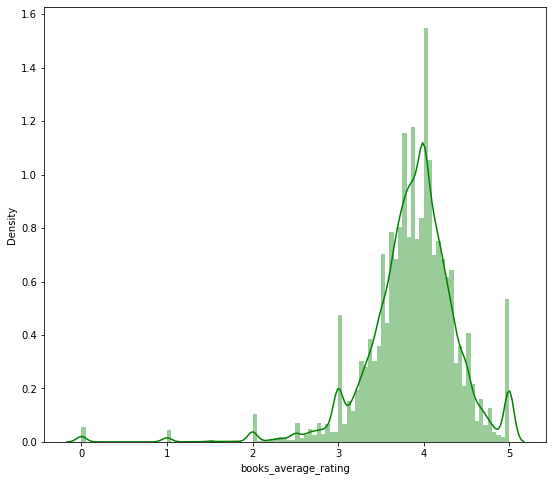

In [86]:
plt.figure(figsize=(9, 8))
sns.distplot(merged['books_average_rating'], color='g', bins=100, hist_kws={'alpha': 0.4});

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


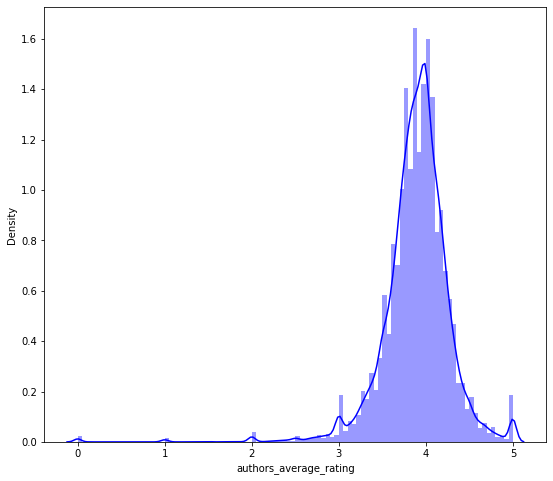

In [89]:
plt.figure(figsize=(9, 8))
sns.distplot(merged['authors_average_rating'], color='b', bins=100, hist_kws={'alpha': 0.4});

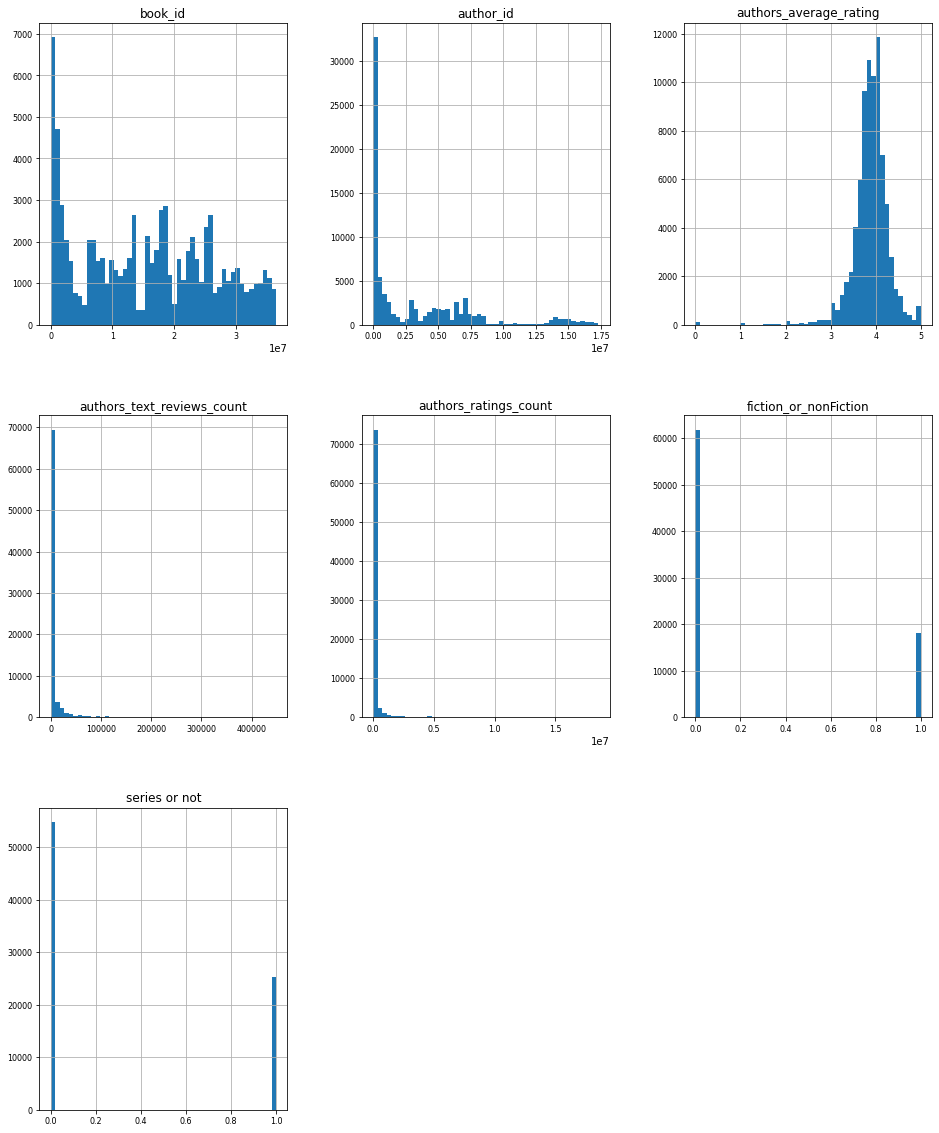

In [90]:
merged.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

**Now that we have cleaned up and joined all the essential datasets, we can set up 3 dataframes and specific variables that will be used to  test and predict book's success**

A. Research Question 1 - Book's success based of the average rating: take the log weighted rating of each book by multipleying the average rating of each book by the number of ratings to get the true rating/sucess of the book

In [52]:
RQ1_filtered = merged[["title", "author_id","description","books_average_rating","books_ratings_count", "publication_year"]]

In [53]:
## Take the log weighted rating to avoid bias. For example, an author could have  a 5 star average rating but it could be based of only 1 rating count. 
##Log weighted rating eliminates this bias. 


RQ1_filtered["log_weighted_rating"] = np.log(pd.to_numeric(RQ1_filtered["books_average_rating"])*pd.to_numeric(RQ1_filtered["books_ratings_count"]))

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [54]:
RQ1_filtered = RQ1_filtered.sort_values(by='log_weighted_rating', ascending=False)

In [55]:
RQ1_filtered

,title,author_id,description,books_average_rating,books_ratings_count,publication_year,log_weighted_rating
13698,"Bridget Jones's Diary (Bridget Jones, #1)",3090,Meet Bridget Jones--a 30-something Singleton w...,3.75,748926,1999,14.848151
9178,"The Girl Who Played with Fire (Millennium, #2)",706255,The Expose\nMillenniumpublisher Mikael Blomkvi...,4.22,575163,2009,14.702244
41096,"Unbroken: A World War II Story of Survival, Re...",30913,"In her long-awaited new book, Laura Hillenbran...",4.39,504961,2010,14.611566
10126,The Name of the Wind (The Kingkiller Chronicle...,108424,"Told in Kvothe's own voice, this is the tale o...",4.55,416634,2007,14.455091
2823,"Jurassic Park (Jurassic Park, #1)",5194,"En esta espectacular novela, los dinosaurios v...",3.97,447936,2006,14.391172
...,...,...,...,...,...,...,...
47701,Rainmaker,2959562,This is another book of poetry from the same s...,0.00,0,2010,-inf
42829,Uncovering Her Nine Month Secret,771847,"""You wouldn't have been able to resist either,...",3.57,0,2014,-inf
3754,The Erotic History of France,628281,,5.00,0,1933,-inf
7658,Wiki Leaks: Inside Julian Assange's War On Sec...,134779,A team of journalists with unparalleled inside...,3.47,0,2011,-inf


B. Research Question 2: Do nonfiction/fiction binomial classifications contribute to books success, with success measured by books_average_rating?

In [56]:
RQ2_filtered = merged [["title", "name", "description", "books_average_rating", "books_ratings_count", "genres", "fiction_or_nonFiction"]]

In [57]:
RQ2_filtered

,title,name,description,books_average_rating,books_ratings_count,genres,fiction_or_nonFiction
0,W.C. Fields: A Life on Film,Ronald J. Fields,,4.00,3,"[history, historical fiction, biography]",0
1,Good Harbor,Anita Diamant,"Anita Diamant's international bestseller ""The ...",3.23,10,"[fiction, history, historical fiction, biography]",0
2,The Red Tent,Anita Diamant,IN THE RED TENT--NOW A MAJOR LIFETIME MINISERI...,4.16,134,"[fiction, history, historical fiction, biograp...",0
3,The Red Tent,Anita Diamant,The red tent is the place where women gathered...,4.16,460,"[fiction, history, historical fiction, biograp...",0
4,"Saying Kaddish: How to Comfort the Dying, Bury...",Anita Diamant,"Anita Diamant's knowledge, sensitivity, and cl...",4.16,107,"[non-fiction, history, historical fiction, bio...",1
...,...,...,...,...,...,...,...
79982,"We Love You, Charlie Freeman",Kaitlyn Greenidge,"""Kaitlyn Greenidge's debut novel slips a very ...",3.51,181,"[fiction, history, historical fiction, biograp...",0
79983,The Alpha's Prey,Lou Kelly,Aaron Lowell is an Alpha wolf whose human mate...,4.05,150,"[fantasy, paranormal, romance]",0
79984,The Winter of the Lions,Jan Costin Wagner,"Every year since the tragic death of his wife,...",3.70,124,"[mystery, thriller, crime, fiction]",0
79985,"Hands on Social Studies, Grades 3-4",Jean Wolf,,3.00,1,[non-fiction],1


C. Research Question 3: Are books that are a part of a series more sucessful than standalone books?

In [58]:
RQ3_filtered = merged [["title", "name", "description", "books_average_rating", "series",  "fiction_or_nonFiction", "series or not"]]

In [59]:
RQ3_filtered

,title,name,description,books_average_rating,series,fiction_or_nonFiction,series or not
0,W.C. Fields: A Life on Film,Ronald J. Fields,,4.00,[],0,0
1,Good Harbor,Anita Diamant,"Anita Diamant's international bestseller ""The ...",3.23,[],0,0
2,The Red Tent,Anita Diamant,IN THE RED TENT--NOW A MAJOR LIFETIME MINISERI...,4.16,[],0,0
3,The Red Tent,Anita Diamant,The red tent is the place where women gathered...,4.16,[],0,0
4,"Saying Kaddish: How to Comfort the Dying, Bury...",Anita Diamant,"Anita Diamant's knowledge, sensitivity, and cl...",4.16,[],1,0
...,...,...,...,...,...,...,...
79982,"We Love You, Charlie Freeman",Kaitlyn Greenidge,"""Kaitlyn Greenidge's debut novel slips a very ...",3.51,[],0,0
79983,The Alpha's Prey,Lou Kelly,Aaron Lowell is an Alpha wolf whose human mate...,4.05,[],0,0
79984,The Winter of the Lions,Jan Costin Wagner,"Every year since the tragic death of his wife,...",3.70,[292388],0,1
79985,"Hands on Social Studies, Grades 3-4",Jean Wolf,,3.00,[],1,0


*Bonus Features to explore*

D. Research Question 4: Does author's historical popularity contribute to the success of their books?

In [60]:
RQ4_filtered = merged[["title","name", "author_id","authors_average_rating","authors_ratings_count"]]


In [61]:
RQ4_filtered["author_log_weighted_rating"] = np.log(pd.to_numeric(RQ4_filtered["authors_average_rating"])*pd.to_numeric(RQ4_filtered["authors_ratings_count"]))
RQ4_filtered = RQ4_filtered.sort_values(by='author_log_weighted_rating', ascending=False)


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
RQ4_filtered

,title,name,author_id,authors_average_rating,authors_ratings_count,author_log_weighted_rating
9800,Гаррі Поттер і смертельні реліквії (Гаррі Потт...,J.K. Rowling,1077326,4.44,18532721,18.225703
9787,Harry Potter and the Goblet of Fire,J.K. Rowling,1077326,4.44,18532721,18.225703
9786,The Casual Vacancy,J.K. Rowling,1077326,4.44,18532721,18.225703
9785,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,1077326,4.44,18532721,18.225703
9784,Fantastic Beasts and Where to Find Them,J.K. Rowling,1077326,4.44,18532721,18.225703
...,...,...,...,...,...,...
41031,Clones from the Future,Casey Bong,16260890,0.00,0,-inf
37485,Shark in the Water - Book # 1 of the Cold War ...,Thomas Lyons,8577906,0.00,0,-inf
11508,Norms and the State in China,Huang Chun-Chieh,5748350,0.00,0,-inf
70835,Man of Genius,Harriet Miller Davidson,4265180,0.00,0,-inf


E. Research Question 5: Does authors productivity (in terms of lenths of the books written, how many books authors have written prevsiouly) contribute to books' success?

In [63]:
authors_df

,average_rating,author_id,text_reviews_count,name,ratings_count
0,3.98,604031,7,Ronald J. Fields,49
1,4.08,626222,28716,Anita Diamant,546796
2,3.92,10333,5075,Barbara Hambly,122118
3,3.68,9212,36262,Jennifer Weiner,888522
4,3.82,149918,96,Nigel Pennick,1740
...,...,...,...,...,...
829524,4.36,197551,4,Patty Furbush,11
829525,4.33,3988103,3,Jim Schlinkman,6
829526,4.00,13464507,2,Rich Jolly,18
829527,3.31,7427847,1,sr@ mwrGn,13


In [64]:
merged.book_id

0         5333265
1         1333909
2        22240073
3          829305
4           47182
           ...   
79982    29361721
79983    34456459
79984    11404897
79985     6186287
79986    16140217
Name: book_id, Length: 79987, dtype: int64

In [65]:
merged.author_id.dtype

dtype('int64')

In [66]:
#group by authorid and count how many books each author has written and average number of pages authors have written


total_books = merged.groupby("author_id").agg(total_books = pd.NamedAgg(column = "book_id", aggfunc = 'count'), total_pages = pd.NamedAgg(column = "num_pages", aggfunc = 'sum'))
total_books = total_books[(total_books['total_pages'].str.len() != 0)]

In [67]:
total_books

,total_books,total_pages
author_id,,
4,21,1926282082072426282162881922143582242382252552...
7,15,2425124975606156928837926943219385
10,1,528
12,1,296
14,2,361288
...,...,...
17264133,1,64
17265337,1,98
17290483,1,108


In [68]:
pd.to_numeric(total_books.total_pages, downcast = 'float',errors='coerce')
pd.to_numeric(total_books.total_books, downcast = 'float', errors='coerce')


author_id
4           21.0
7           15.0
10           1.0
12           1.0
14           2.0
            ... 
17264133     1.0
17265337     1.0
17290483     1.0
17300081     1.0
17318869     1.0
Name: total_books, Length: 37129, dtype: float32

In [69]:
total_books["pgs_per_book"] = total_books["total_pages"].astype(np.float32)/total_books["total_books"].astype(np.float32)

In [70]:
total_books

,total_books,total_pages,pgs_per_book
author_id,,,
4,21,1926282082072426282162881922143582242382252552...,inf
7,15,2425124975606156928837926943219385,1.616750e+32
10,1,528,5.280000e+02
12,1,296,2.960000e+02
14,2,361288,1.806440e+05
...,...,...,...
17264133,1,64,6.400000e+01
17265337,1,98,9.800000e+01
17290483,1,108,1.080000e+02


In [71]:
RQ5_filtered = merged[merged.author_id.isin(total_books.index)].join(total_books[["total_books","pgs_per_book"]],on="author_id")

In [72]:
RQ5_filtered

,isbn,books_reviews_count,series,country_code,language_code,asin,is_ebook,books_average_rating,kindle_asin,similar_books,description,format,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,book_id,books_ratings_count,work_id,title,title_without_series,author_id,authors_average_rating,authors_text_reviews_count,name,authors_ratings_count,genres,fiction_or_nonFiction,series or not,total_books,pgs_per_book
0,0312853122,1,[],US,,,false,4.00,,[],,Paperback,"[{'author_id': '604031', 'role': ''}]",St. Martin's Press,256,1,9780312853129,9,,1984,5333265,3,5400751,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film,604031,3.98,7,Ronald J. Fields,49,"[history, historical fiction, biography]",0,0,1,2.560000e+02
1,0743509986,6,[],US,,,false,3.23,B000FC0PBC,"[8709549, 17074050, 28937, 158816, 228563, 112...","Anita Diamant's international bestseller ""The ...",Audio CD,"[{'author_id': '626222', 'role': ''}]",Simon & Schuster Audio,,1,9780743509985,10,Abridged,2001,1333909,10,1323437,Good Harbor,Good Harbor,626222,4.08,28716,Anita Diamant,546796,"[fiction, history, historical fiction, biography]",0,0,6,5.872271e+10
2,1250066611,19,[],US,eng,,false,4.16,B0759TPNWM,"[405146, 828672, 130970, 114469, 3273, 358494,...",IN THE RED TENT--NOW A MAJOR LIFETIME MINISERI...,Paperback,"[{'author_id': '626222', 'role': ''}]",Picador,352,4,9781250066619,11,,2014,22240073,134,1041558,The Red Tent,The Red Tent,626222,4.08,28716,Anita Diamant,546796,"[fiction, history, historical fiction, biograp...",0,0,6,5.872271e+10
3,0330487965,60,[],US,,,false,4.16,B0759TPNWM,"[405146, 828672, 130970, 114469, 3273, 358494,...",The red tent is the place where women gathered...,Paperback,"[{'author_id': '626222', 'role': ''}]",Pan Books,336,,9780330487962,,,2002,829305,460,1041558,The Red Tent,The Red Tent,626222,4.08,28716,Anita Diamant,546796,"[fiction, history, historical fiction, biograp...",0,0,6,5.872271e+10
4,0805210881,14,[],US,,,false,4.16,B000TKHOLE,"[181879, 2650339, 542701, 949979, 103468, 1174...","Anita Diamant's knowledge, sensitivity, and cl...",Paperback,"[{'author_id': '626222', 'role': ''}]",Schocken Books Inc,288,12,9780805210880,7,,1999,47182,107,46229,"Saying Kaddish: How to Comfort the Dying, Bury...","Saying Kaddish: How to Comfort the Dying, Bury...",626222,4.08,28716,Anita Diamant,546796,"[non-fiction, history, historical fiction, bio...",1,0,6,5.872271e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79978,0062316893,899,[],US,eng,,false,3.91,B00JOG4TOY,"[21936660, 23201410, 23014679, 18583830, 18143...","In 1912, twenty-year-old Tilly Harper leaves t...",Paperback,"[{'author_id': '5774172', 'role': ''}]",William Morrow Paperbacks,432,3,9780062316899,2,,2015,21936857,5209,41240468,A Memory of Violets: A Novel of London's Flowe...,A Memory of Violets: A Novel of London's Flowe...,5774172,3.87,3650,Hazel Gaynor,24895,"[fiction, history, historical fiction, biograp...",0,0,1,4.320000e+02
79979,1593074263,5,[282755],US,,,false,4.59,,[],,Hardcover,"[{'author_id': '66497', 'role': ''}]",Dark Horse Comics,184,25,9781593074265,10,,2005,9196141,39,14075647,The Goon Fancy Pants Edition - Volume 1,The Goon Fancy Pants Edition - Volume 1,66497,4.06,1691,Eric Powell,33282,"[comics, graphic, fiction, mystery, thriller, ...",0,1,1,1.840000e+02
79980,,27,[],US,eng,,false,4.60,B0723FZH61,[],"Cherie Kephart, a young woman who longed for a...",Paperback,"[{'author_id': '16889073', 'role': ''}]",Bazi Publishing,254,7,9781947127012,9,,2017,35229557,37,56575668,A Few Minor Adjustments: A Memoir of Healing,A Few Minor Adjustments: A Memoir of Healing,16889073,4.60,30,Cherie Kephart,43,"[non-fiction, history, historical fiction, bio...",1,0,1,2.540000e+02
79984,1846553466,24,[292388],US,eng,,false,3.70,B0050OLFF0,"[12828601, 12017508, 3052892, 23010405, 118908...","Every year since the tragic death of his wife,.

**Preparation for Decision Tree Modeling Classification**: exploring Research Question 1 (book success using log_weighted rating)


In [73]:
#import packages

import nltk
from nltk.tokenize import word_tokenize
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [74]:
merged

,isbn,books_reviews_count,series,country_code,language_code,asin,is_ebook,books_average_rating,kindle_asin,similar_books,description,format,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,book_id,books_ratings_count,work_id,title,title_without_series,author_id,authors_average_rating,authors_text_reviews_count,name,authors_ratings_count,genres,fiction_or_nonFiction,series or not
0,0312853122,1,[],US,,,false,4.00,,[],,Paperback,"[{'author_id': '604031', 'role': ''}]",St. Martin's Press,256,1,9780312853129,9,,1984,5333265,3,5400751,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film,604031,3.98,7,Ronald J. Fields,49,"[history, historical fiction, biography]",0,0
1,0743509986,6,[],US,,,false,3.23,B000FC0PBC,"[8709549, 17074050, 28937, 158816, 228563, 112...","Anita Diamant's international bestseller ""The ...",Audio CD,"[{'author_id': '626222', 'role': ''}]",Simon & Schuster Audio,,1,9780743509985,10,Abridged,2001,1333909,10,1323437,Good Harbor,Good Harbor,626222,4.08,28716,Anita Diamant,546796,"[fiction, history, historical fiction, biography]",0,0
2,1250066611,19,[],US,eng,,false,4.16,B0759TPNWM,"[405146, 828672, 130970, 114469, 3273, 358494,...",IN THE RED TENT--NOW A MAJOR LIFETIME MINISERI...,Paperback,"[{'author_id': '626222', 'role': ''}]",Picador,352,4,9781250066619,11,,2014,22240073,134,1041558,The Red Tent,The Red Tent,626222,4.08,28716,Anita Diamant,546796,"[fiction, history, historical fiction, biograp...",0,0
3,0330487965,60,[],US,,,false,4.16,B0759TPNWM,"[405146, 828672, 130970, 114469, 3273, 358494,...",The red tent is the place where women gathered...,Paperback,"[{'author_id': '626222', 'role': ''}]",Pan Books,336,,9780330487962,,,2002,829305,460,1041558,The Red Tent,The Red Tent,626222,4.08,28716,Anita Diamant,546796,"[fiction, history, historical fiction, biograp...",0,0
4,0805210881,14,[],US,,,false,4.16,B000TKHOLE,"[181879, 2650339, 542701, 949979, 103468, 1174...","Anita Diamant's knowledge, sensitivity, and cl...",Paperback,"[{'author_id': '626222', 'role': ''}]",Schocken Books Inc,288,12,9780805210880,7,,1999,47182,107,46229,"Saying Kaddish: How to Comfort the Dying, Bury...","Saying Kaddish: How to Comfort the Dying, Bury...",626222,4.08,28716,Anita Diamant,546796,"[non-fiction, history, historical fiction, bio...",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79982,,19,[],US,eng,,true,3.51,,"[25330175, 25810398, 23482810, 25739173, 18090...","""Kaitlyn Greenidge's debut novel slips a very ...",,"[{'author_id': '14131894', 'role': ''}]",,,,,,,,29361721,181,45666612,"We Love You, Charlie Freeman","We Love You, Charlie Freeman",14131894,3.51,398,Kaitlyn Greenidge,1988,"[fiction, history, historical fiction, biograp...",0,0
79983,,21,[],US,eng,B06XDT8BD3,true,4.05,B06XDT8BD3,[],Aaron Lowell is an Alpha wolf whose human mate...,,"[{'author_id': '4292949', 'role': ''}, {'autho...",,,,,,,,34456459,150,55570618,The Alpha's Prey,The Alpha's Prey,4292949,4.04,125,Lou Kelly,683,"[fantasy, paranormal, romance]",0,0
79984,1846553466,24,[292388],US,eng,,false,3.70,B0050OLFF0,"[12828601, 12017508, 3052892, 23010405, 118908...","Every year since the tragic death of his wife,...",Paperback,"[{'author_id': '530589', 'role': ''}, {'author...",Harvill Secker,266,9,9781846553462,6,,2011,11404897,124,16337632,The Winter of the Lions,The Winter of the Lions,530589,3.53,172,Jan Costin Wagner,1101,"[mystery, thriller, crime, fiction]",0,1
79985,1568220049,1,[],US,,,false,3.00,,[],,,"[{'author_id': '2099472', 'role': ''}, {'autho...",,,,9781568220048,,,,6186287,1,6366572,"Hands on Social Studies, Grades 3-4","Hands on Social Studies, Grades 3-4",2099472,2.67,1,Jean Wolf,3,[non-fiction],1,0


In [75]:
RQ1_filtered

,title,author_id,description,books_average_rating,books_ratings_count,publication_year,log_weighted_rating
13698,"Bridget Jones's Diary (Bridget Jones, #1)",3090,Meet Bridget Jones--a 30-something Singleton w...,3.75,748926,1999,14.848151
9178,"The Girl Who Played with Fire (Millennium, #2)",706255,The Expose\nMillenniumpublisher Mikael Blomkvi...,4.22,575163,2009,14.702244
41096,"Unbroken: A World War II Story of Survival, Re...",30913,"In her long-awaited new book, Laura Hillenbran...",4.39,504961,2010,14.611566
10126,The Name of the Wind (The Kingkiller Chronicle...,108424,"Told in Kvothe's own voice, this is the tale o...",4.55,416634,2007,14.455091
2823,"Jurassic Park (Jurassic Park, #1)",5194,"En esta espectacular novela, los dinosaurios v...",3.97,447936,2006,14.391172
...,...,...,...,...,...,...,...
47701,Rainmaker,2959562,This is another book of poetry from the same s...,0.00,0,2010,-inf
42829,Uncovering Her Nine Month Secret,771847,"""You wouldn't have been able to resist either,...",3.57,0,2014,-inf
3754,The Erotic History of France,628281,,5.00,0,1933,-inf
7658,Wiki Leaks: Inside Julian Assange's War On Sec...,134779,A team of journalists with unparalleled inside...,3.47,0,2011,-inf


1. Vectorize the text data: title and description

In [76]:
nltk.download('stopwords')
nltk.download('punkt')
vectorizer = CountVectorizer(max_features=2000, tokenizer= word_tokenize)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [77]:
title_X = vectorizer.fit_transform(merged.title).toarray()
description_X = vectorizer.fit_transform(merged.description).toarray()


In [79]:
#transform publishers column into dictionary set to numerical values. 

pub_dict = {}
k = 0
for i in set(merged.publisher):
    pub_dict[i] = k
    k+=1

In [80]:
merged["publisher"].replace(pub_dict, inplace = True)

In [81]:
#check
merged["publisher"]

0         7420
1        17358
2        12878
3         4856
4          898
         ...  
79982        0
79983        0
79984     1470
79985        0
79986      450
Name: publisher, Length: 79987, dtype: int64

Set the categorical data (any text or binary classifications) and transform into numerical data. X 

In [82]:
#categorical data
categorical_cols = ['author_id', 'publisher', 'publication_year', 'series or not','fiction_or_nonFiction'] 

#import pandas as pd
#numerics_data = pd.get_dummies((merged.categorical_cols.values.tolist()), prefix_sep='', prefix='')

In [ ]:
numerics_data = pd.get_dummies(merged[["author_id", 'publisher', 'publication_year', 'series or not','fiction_or_nonFiction']], columns=categorical_cols)
